## Accident by land use

In [1]:
# Thirth part: accident by land use

import pandas as pd
import numpy as np
from google.cloud import bigquery

## Extract the data from bigquery ##
client = bigquery.Client(project='phydata-desafio1')
QUERY3 = """
SELECT
  land_use_name,
  COUNT(*) AS num_accidents
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  land_use_name
ORDER BY
  num_accidents DESC
  """
query_job = client.query(QUERY3)  # API request
results = query_job.result()  # Waits for query to finish
data_frame_land = results.to_dataframe()
name_database = 'land_use_accidents' # Name of the database
data_frame_land.to_csv(name_database + '.csv', index=False) # Save the data in a csv file

## Plot the data ##



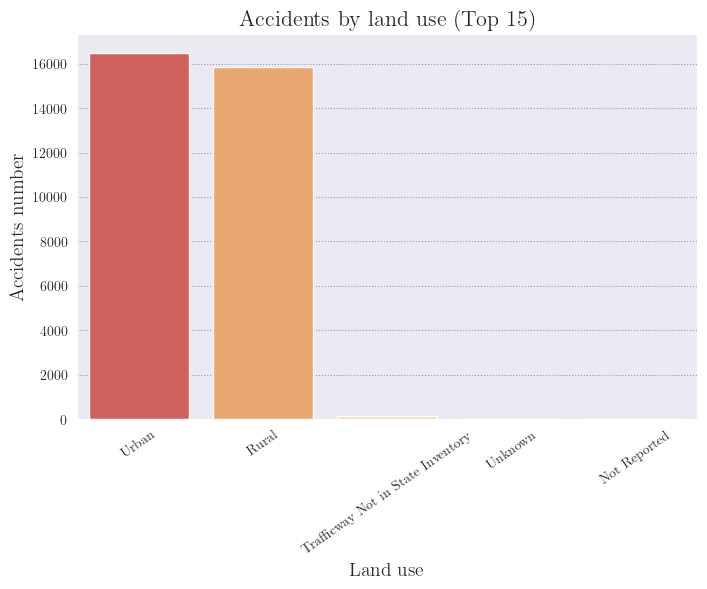

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Accident number by land use (Top 15)

# Configurar el estilo de seaborn
palette = sns.color_palette("Spectral")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.barplot(x='land_use_name', y='num_accidents', data=data_frame_land, palette=palette)

# Etiquetas y título
plt.xlabel(r'Land use',fontdict={'fontsize': 14})
plt.ylabel(r'Accidents number',fontdict={'fontsize': 14})
plt.title(r'Accidents by land use (Top 15)',fontdict={'fontsize': 16})

# Rotar etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=35)

# Mostrar el gráfico
plt.show()